## SENTIMENT ANALYSIS FOR TWEETS

### About the dataset
#### --It contains information positive and negative tweets of 3 specified applications.
#### 1.Sanpdeal
#### 2.Amazon
#### 3. Flipkart

### Problem Statement
#### --The aim is to make the wordcloud to define the positive and negative tweets

### Import required Libraries

In [1]:
#Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

#Import Wordcloud library
from wordcloud import WordCloud

#Import textblob library
from textblob import TextBlob

#Import re
import re

In [2]:
#pip install textblob

# SNAPDEAL TWEETS

### Review the data

In [3]:
sd = pd.read_csv('snapdeal_tweets.csv')

In [4]:
#Show first 10 rows
sd.head(10)

,Unnamed: 0,snapdeal_tweets
0,0,Heartbroken to share that our colleague of 9 y...
1,1,We have waived shipping charges on all product...
2,2,@HarjotPal4 Getting this checked with the conc...
3,3,@BasavarajKandri Hi! Please elaborate on what ...
4,4,@Snapdeal_Help I am basavaraj kandri. Please ...
5,5,@Snapdeal_Help Work on this report as soon as ...
6,6,@HarjotPal4 We always request our customers to...
7,7,@HarjotPal4 Hi! Apologies for the experience y...
8,8,@AmazonHelp @JeffBezos @havellsindia @AmitAgar...
9,9,@Sanpdeal3 Snapdeal is a fake companyThis comp...


### clean the text(remove all the links,hashtags, @, numbers)

In [5]:
def clean_text(text):
    clean_words = re.sub(r"http\S+","",text)
    clean_words = re.sub('#[\w]*',"",clean_words)
    clean_words = re.sub('#[\w]*@',"",clean_words)
    clean_words = re.sub('[^a-zA-Z]'," ",clean_words)
    return clean_words

In [6]:
clean_data = sd.iloc[:,1].apply(clean_text)

In [7]:
clean_data

0      Heartbroken to share that our colleague of   y...
1      We have waived shipping charges on all product...
2       HarjotPal  Getting this checked with the conc...
3       BasavarajKandri Hi  Please elaborate on what ...
4       Snapdeal Help  I am basavaraj kandri  Please ...
                             ...                        
187     snapdeal Would never ever again order from SN...
188     Beingsajiddarr It was actually planned to be ...
189    RT  snapdeal  Complete the Snapdeal tagline in...
190    RT   kunalbahl  Snapdeal highlights its value ...
191    RT  AditiS      Welcome to the hottest seed se...
Name: snapdeal_tweets, Length: 192, dtype: object

In [8]:
#Make dataframew of clean_data
clean_data = pd.DataFrame(clean_data)

In [9]:
# Show first 10 rows
clean_data.head(10)

,snapdeal_tweets
0,Heartbroken to share that our colleague of y...
1,We have waived shipping charges on all product...
2,HarjotPal Getting this checked with the conc...
3,BasavarajKandri Hi Please elaborate on what ...
4,Snapdeal Help I am basavaraj kandri Please ...
5,Snapdeal Help Work on this report as soon as ...
6,HarjotPal We always request our customers to...
7,HarjotPal Hi Apologies for the experience y...
8,AmazonHelp JeffBezos havellsindia AmitAgar...
9,Sanpdeal Snapdeal is a fake companyThis comp...


### Get subjectivity and polariry

In [10]:
#subjectivity means how much the topic is related to comment
#polarity means sentimental(negative comment or positive comment)
#textblob has predefined rule where it is use to calculate the polarity and subjectivity in sentiment analysis
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity
def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [11]:
#to fit the column in data
clean_data['subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [12]:
#Show first 10 rows
clean_data.head(10)

,snapdeal_tweets,subjectivity,Polarity
0,Heartbroken to share that our colleague of y...,0.225000,-0.041667
1,We have waived shipping charges on all product...,0.000000,0.000000
2,HarjotPal Getting this checked with the conc...,0.200000,0.200000
3,BasavarajKandri Hi Please elaborate on what ...,0.758333,0.000000
4,Snapdeal Help I am basavaraj kandri Please ...,0.000000,0.000000
5,Snapdeal Help Work on this report as soon as ...,1.000000,0.000000
6,HarjotPal We always request our customers to...,0.183333,0.000000
7,HarjotPal Hi Apologies for the experience y...,0.000000,0.000000
8,AmazonHelp JeffBezos havellsindia AmitAgar...,0.500000,0.200000
9,Sanpdeal Snapdeal is a fake companyThis comp...,1.000000,-0.500000


### Define Positive and Negative comments

In [13]:
def sentiment(polarity):
# If Polarity is greater than 0,It returns Positive
     if polarity >=0:
        return 'Positive'
# If polarity is less than 0, It returns Negative
     elif polarity<0:
        return 'Negative'

In [14]:
# Add a column named sentiment
clean_data['sentiment'] = clean_data['Polarity'].apply(sentiment)

In [15]:
# Show first 10 lines.
clean_data.head(10)

,snapdeal_tweets,subjectivity,Polarity,sentiment
0,Heartbroken to share that our colleague of y...,0.225000,-0.041667,Negative
1,We have waived shipping charges on all product...,0.000000,0.000000,Positive
2,HarjotPal Getting this checked with the conc...,0.200000,0.200000,Positive
3,BasavarajKandri Hi Please elaborate on what ...,0.758333,0.000000,Positive
4,Snapdeal Help I am basavaraj kandri Please ...,0.000000,0.000000,Positive
5,Snapdeal Help Work on this report as soon as ...,1.000000,0.000000,Positive
6,HarjotPal We always request our customers to...,0.183333,0.000000,Positive
7,HarjotPal Hi Apologies for the experience y...,0.000000,0.000000,Positive
8,AmazonHelp JeffBezos havellsindia AmitAgar...,0.500000,0.200000,Positive
9,Sanpdeal Snapdeal is a fake companyThis comp...,1.000000,-0.500000,Negative


In [16]:
#Show negative tweet
clean_data[clean_data['sentiment']=='Negative']

,snapdeal_tweets,subjectivity,Polarity,sentiment
0,Heartbroken to share that our colleague of y...,0.225000,-0.041667,Negative
9,Sanpdeal Snapdeal is a fake companyThis comp...,1.000000,-0.500000,Negative
10,Snapdeal Help Hi Ashi There was nothing wron...,0.900000,-0.500000,Negative
12,Deepank So sorry to disappoint you I...,0.600000,-0.150000,Negative
14,I checked out snapdeal just because of genel...,0.214286,-0.071429,Negative
20,Owner of snapdeal lost his aunt due to shorta...,0.375000,-0.125000,Negative
21,snapdeal very bad quality oximeter in your we...,0.866667,-0.910000,Negative
31,rpandith Really sorry for the unpleasant ex...,0.975000,-0.575000,Negative
33,rpandith We are in coordination with our te...,0.225000,-0.025000,Negative
34,I told your exec if you are not capable cancel...,0.400000,-0.100000,Negative


In [17]:
# Shows specific column tweet
clean_data.iloc[175,0]

' Shivani         We certainly understand your disappointment  We re closely following up on this and soon you ll he  '

### Negative tweets wordcloud

In [18]:
#Make a list of negative tweets
text_list = list(clean_data[clean_data['sentiment']=='Negative']['snapdeal_tweets'])
text = " ".join(text_list)

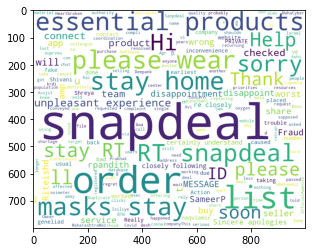

In [19]:
#wordcloud or tag cloud means the graphical representation which gives the words in a graph form
#Make wordcloud
import matplotlib.pyplot as plt
wc=WordCloud(background_color = 'white',width=1000,height=800).generate(text)
plt.imshow(wc)
plt.show()

### Positive tweets wordcloud

In [20]:
#Make a list of positive tweets
text_list = list(clean_data[clean_data['sentiment']=='Positive']['snapdeal_tweets'])
text = " ".join(text_list)

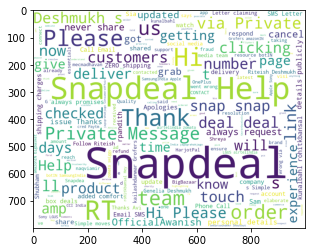

In [21]:
#Make wordcloud
wc = WordCloud(background_color = 'white',width = 1000,height = 800).generate(text)
plt.imshow(wc)
plt.show()

# AMAZON TWEETS

### Review the data

In [22]:
data = pd.read_csv("amazon_tweets.csv")

In [23]:
#Show first 10 lines
data.head(10)

,Unnamed: 0,amazon_tweets
0,0,𝗞𝗞𝗥 𝗙𝗶𝗹𝗺𝘀 𝗘𝗽. 𝟰: Coach McCullum says he’s the ...
1,1,"Initially unsold in '14, 𝙈𝙑𝙋 the next year. 💪🏼..."
2,2,#Mi11XPro: A Cut Above The Best!💪\n\n📱#Snapdra...
3,3,"Hey @amazonIN , I ordered a book from amazon, ..."
4,4,My amazon account has been blocked my @amazonI...
5,5,DK HOME APPLIANCES Professional Series Finger ...
6,6,Can we involve e-com like @Flipkart @amazonIN ...
7,7,Team Amazon Besharmi ki had Kardi Apne 29 Apri...
8,8,Dear @amazonIN \n\nI'm not able to login to my...
9,9,Theme of the month for @PrimeVideoIN subscribe...


### clean the text(remove all the links,hashtags, @, numbers)

In [32]:
def clean_text(text):
    clean_words = re.sub(r"http\S+","",text)
    clean_words = re.sub("#[\w]*","",clean_words)
    clean_words = re.sub('#[\w]*@',"",clean_words)
    clean_words = re.sub("[^a-zA-Z]"," ",clean_words)
    return clean_words
    

In [33]:
clean_data = data.iloc[:,1].apply(clean_text)


In [34]:
clean_data

0                        Coach McCullum says he s the ...
1       Initially unsold in          the next year    ...
2         A Cut Above The Best            A    bright ...
3       Hey  amazonIN   I ordered a book from amazon  ...
4       My amazon account has been blocked my  amazonI...
                              ...                        
2909    I got all the answers correct  amazonIN   OneP...
2910    Ofcourse it would be the beast Snapdragon     ...
2911    I played this interesting Quiz on Amazon     a...
2912    The power that is  will now be delivered at yo...
2913    While searching online after no availability i...
Name: amazon_tweets, Length: 2914, dtype: object

In [35]:
#Make dataframe
clean_data = pd.DataFrame(clean_data)

In [36]:
# Show first 10 rows
clean_data.head(10)

,amazon_tweets
0,Coach McCullum says he s the ...
1,Initially unsold in the next year ...
2,A Cut Above The Best A bright ...
3,Hey amazonIN I ordered a book from amazon ...
4,My amazon account has been blocked my amazonI...
5,DK HOME APPLIANCES Professional Series Finger ...
6,Can we involve e com like Flipkart amazonIN ...
7,Team Amazon Besharmi ki had Kardi Apne Apri...
8,Dear amazonIN I m not able to login to my a...
9,Theme of the month for PrimeVideoIN subscribe...


### Get subjectivity and polariry

In [37]:
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity
def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [38]:
#to fit the column in data
clean_data['Subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['Polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [39]:
clean_data.head(10)

,amazon_tweets,Subjectivity,Polarity
0,Coach McCullum says he s the ...,0.000000,0.000000
1,Initially unsold in the next year ...,0.333333,0.166667
2,A Cut Above The Best A bright ...,0.400000,0.566667
3,Hey amazonIN I ordered a book from amazon ...,0.000000,0.000000
4,My amazon account has been blocked my amazonI...,0.000000,0.000000
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000
6,Can we involve e com like Flipkart amazonIN ...,0.000000,0.000000
7,Team Amazon Besharmi ki had Kardi Apne Apri...,0.000000,0.000000
8,Dear amazonIN I m not able to login to my a...,0.625000,-0.250000
9,Theme of the month for PrimeVideoIN subscribe...,0.000000,0.000000


### Define Positive and Negative comments

In [40]:
def sentiment(Polarity):
# If Polarity is greater than 0,It returns Positive
    if Polarity>=0:
        return 'positive'
# If Polarity is less than 0,It returns Negative
    elif Polarity<0:
        return 'Negative'

In [41]:
#Add new column named sentiment
clean_data['sentiment'] = clean_data['Polarity'].apply(sentiment)

In [42]:
clean_data.head(10)

,amazon_tweets,Subjectivity,Polarity,sentiment
0,Coach McCullum says he s the ...,0.000000,0.000000,positive
1,Initially unsold in the next year ...,0.333333,0.166667,positive
2,A Cut Above The Best A bright ...,0.400000,0.566667,positive
3,Hey amazonIN I ordered a book from amazon ...,0.000000,0.000000,positive
4,My amazon account has been blocked my amazonI...,0.000000,0.000000,positive
5,DK HOME APPLIANCES Professional Series Finger ...,0.100000,0.100000,positive
6,Can we involve e com like Flipkart amazonIN ...,0.000000,0.000000,positive
7,Team Amazon Besharmi ki had Kardi Apne Apri...,0.000000,0.000000,positive
8,Dear amazonIN I m not able to login to my a...,0.625000,-0.250000,Negative
9,Theme of the month for PrimeVideoIN subscribe...,0.000000,0.000000,positive


### Negative tweet wordcloud

In [43]:
clean_data[clean_data['sentiment']=='Negative']

,amazon_tweets,Subjectivity,Polarity,sentiment
8,Dear amazonIN I m not able to login to my a...,0.625000,-0.250000,Negative
14,amazonIN SamsungIndia GOT SERIOUS power,0.666667,-0.333333,Negative
15,A few days ago I bought a WI C and It was m...,0.422222,-0.133333,Negative
19,Are you guys serious Sent not for sale item ...,0.666667,-0.333333,Negative
39,We bought a robotic iLife S vaccum cleaner f...,0.200000,-0.100000,Negative
...,...,...,...,...
2870,Pulse oximeters now nearly out of stock on am...,0.166667,-0.033333,Negative
2875,Twisted Tales From The Universe Star Lady Tal...,1.000000,-0.500000,Negative
2880,I had amazing experience with amazonIN where...,0.825000,-0.075000,Negative
2891,Such a pathetic service on Refunds You ve lit...,0.600000,-0.333333,Negative


In [44]:
text_list = list(clean_data[clean_data['sentiment']=='Negative']['amazon_tweets'])
text = " ".join(text_list)

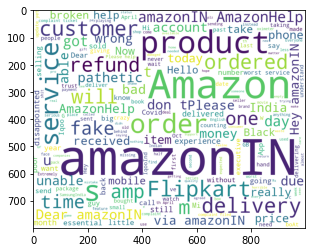

In [45]:
wc = WordCloud(background_color = 'white',width = 1000,height = 800).generate(text)
plt.imshow(wc)
plt.show()

### Positive tweet wordcloud

In [46]:
clean_data[clean_data['sentiment']=='positive']

,amazon_tweets,Subjectivity,Polarity,sentiment
0,Coach McCullum says he s the ...,0.000000,0.000000,positive
1,Initially unsold in the next year ...,0.333333,0.166667,positive
2,A Cut Above The Best A bright ...,0.400000,0.566667,positive
3,Hey amazonIN I ordered a book from amazon ...,0.000000,0.000000,positive
4,My amazon account has been blocked my amazonI...,0.000000,0.000000,positive
...,...,...,...,...
2909,I got all the answers correct amazonIN OneP...,0.000000,0.000000,positive
2910,Ofcourse it would be the beast Snapdragon ...,0.000000,0.000000,positive
2911,I played this interesting Quiz on Amazon a...,0.500000,0.500000,positive
2912,The power that is will now be delivered at yo...,0.000000,0.000000,positive


In [47]:
text_list = clean_data[clean_data['sentiment']=='positive']['amazon_tweets']
text = " ".join(text_list)

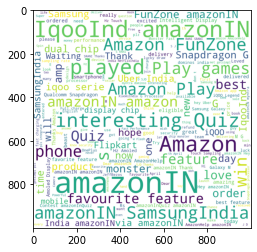

In [48]:
wc = WordCloud(background_color = 'white',width = 1000,height = 1000).generate(text)
plt.imshow(wc)
plt.show()

# FLIPKART TWEETS

### Review the data

In [49]:
data = pd.read_csv(r'C:\Users\Shruti\Downloads\flipkart_tweets.csv')

In [50]:
#Show the first 10 rows
data.head(10)

,Unnamed: 0,Flipkart_tweets
0,0,Poonawala is doing it like those 'Big Dhamaka'...
1,1,Which is your favourite feature of the #realme...
2,2,Time to capture and #DelightEveryMoment with #...
3,3,This is ridiculous just connected with Cc he t...
4,4,This is what happens with me I bought a watch ...
5,5,"Be your happiest self. \nWith SwatchShil, keep..."
6,6,Dear @Flipkart where is my order. It was suppo...
7,7,This is what happens with me I bought a watch ...
8,8,iFFALCON 139 cm (55 inches) 4K Ultra HD Smart ...
9,9,Guys help me find any pharmacy in Patna which ...


### Clean the text(remove all the links,hashtags, @, numbers)

In [51]:
def clean_text(text):
    clean_words = re.sub(r'http\S+','',text)
    clean_words = re.sub('#[\w]*','',clean_words)
    clean_words = re.sub('#[\w]*@','',clean_words)
    clean_words = re.sub('[^a-zA-Z]',' ',clean_words)
    return clean_words

In [52]:
clean_data = data.iloc[:,1].apply(clean_text)

In [53]:
clean_data

0       Poonawala is doing it like those  Big Dhamaka ...
1       Which is your favourite feature of the   G    ...
2       Time to capture and  with   The   MP OIS Night...
3       This is ridiculous just connected with Cc he t...
4       This is what happens with me I bought a watch ...
                              ...                        
2995              Quick brings    minute delivery to D...
2996     hello buddy    cool dude       nice collection  
2997    I did    Knocks in  Challenge       Here its m...
2998    Syska    W T Bulb B   LED Bulb   White  Pack o...
2999    I think  Flipkart is Waste flatform   It Not S...
Name: Flipkart_tweets, Length: 3000, dtype: object

In [54]:
#Make dataframe
clean_data = pd.DataFrame(clean_data)

In [55]:
clean_data

,Flipkart_tweets
0,Poonawala is doing it like those Big Dhamaka ...
1,Which is your favourite feature of the G ...
2,Time to capture and with The MP OIS Night...
3,This is ridiculous just connected with Cc he t...
4,This is what happens with me I bought a watch ...
...,...
2995,Quick brings minute delivery to D...
2996,hello buddy cool dude nice collection
2997,I did Knocks in Challenge Here its m...
2998,Syska W T Bulb B LED Bulb White Pack o...


### Get subjectivity and polariry

In [56]:
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity
def get_pol(text):
    return TextBlob(text).sentiment.polarity

In [57]:
clean_data['subjectivity'] = clean_data.iloc[:,0].apply(get_sub)
clean_data['polarity'] = clean_data.iloc[:,0].apply(get_pol)

In [51]:
clean_data.head(10)

,Flipkart_tweets,subjectivity,polarity
0,Poonawala is doing it like those Big Dhamaka ...,0.216667,0.125000
1,Which is your favourite feature of the G ...,1.000000,0.000000
2,Time to capture and with The MP OIS Night...,1.000000,1.000000
3,This is ridiculous just connected with Cc he t...,0.500000,-0.166667
4,This is what happens with me I bought a watch ...,0.000000,0.000000
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182
6,Dear Flipkart where is my order It was suppo...,0.000000,0.000000
7,This is what happens with me I bought a watch ...,0.000000,0.000000
8,iFFALCON cm inches K Ultra HD Smart ...,0.642857,0.214286
9,Guys help me find any pharmacy in Patna which ...,0.000000,0.000000


### Define Positive and Negative comments

In [58]:
def sentiement(Polarity):
# If Polarity is greater than 0,It returns Positive
    if Polarity >= 0:
        return 'positive'
# If Polarity is less than 0,It returns Negative
    elif Polarity < 0:
        return 'negative'

In [59]:
#Add new column named sentiment
clean_data['sentiment'] = clean_data['polarity'].apply(sentiment)

In [60]:
clean_data.head(10)

,Flipkart_tweets,subjectivity,polarity,sentiment
0,Poonawala is doing it like those Big Dhamaka ...,0.216667,0.125000,positive
1,Which is your favourite feature of the G ...,1.000000,0.000000,positive
2,Time to capture and with The MP OIS Night...,1.000000,1.000000,positive
3,This is ridiculous just connected with Cc he t...,0.500000,-0.166667,Negative
4,This is what happens with me I bought a watch ...,0.000000,0.000000,positive
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182,positive
6,Dear Flipkart where is my order It was suppo...,0.000000,0.000000,positive
7,This is what happens with me I bought a watch ...,0.000000,0.000000,positive
8,iFFALCON cm inches K Ultra HD Smart ...,0.642857,0.214286,positive
9,Guys help me find any pharmacy in Patna which ...,0.000000,0.000000,positive


### Negative tweet wordcloud

In [61]:
clean_data[clean_data['sentiment']=='Negative']

,Flipkart_tweets,subjectivity,polarity,sentiment
3,This is ridiculous just connected with Cc he t...,0.500000,-0.166667,Negative
10,I ordered a groceries on Flipkart but unfortun...,1.000000,-0.500000,Negative
15,The person wearing this Virus Shut Out car...,0.750000,-0.250000,Negative
18,Hands down the craziest deal indeed Fl...,0.288889,-0.155556,Negative
19,Realme G to head on sale lately at pm by ...,0.600000,-0.300000,Negative
...,...,...,...,...
2974,This is so stupid My flight was cancelled fro...,1.000000,-0.800000,Negative
2980,Worst experience and pathetic service after ma...,1.000000,-1.000000,Negative
2981,Worst services by flipkart when needed they de...,0.688889,-0.500000,Negative
2988,Waiting since days But not delivered expe...,0.825000,-0.250000,Negative


In [62]:
text_list = list(clean_data[clean_data['sentiment']=='Negative']['Flipkart_tweets'])
text = ' '.join(text_list)

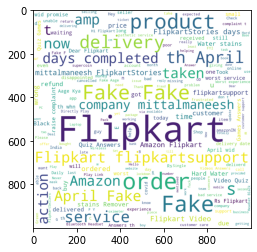

In [63]:
wc = WordCloud(background_color = 'white',width = 1000,height = 1000).generate(text)
plt.imshow(wc)
plt.show()

### Positive tweet wordcloud

In [64]:
clean_data[clean_data['sentiment'] == 'positive']

,Flipkart_tweets,subjectivity,polarity,sentiment
0,Poonawala is doing it like those Big Dhamaka ...,0.216667,0.125000,positive
1,Which is your favourite feature of the G ...,1.000000,0.000000,positive
2,Time to capture and with The MP OIS Night...,1.000000,1.000000,positive
4,This is what happens with me I bought a watch ...,0.000000,0.000000,positive
5,Be your happiest self With SwatchShil keep ...,0.550000,0.168182,positive
...,...,...,...,...
2994,Flipkart to acquire cleartrip Join,0.000000,0.000000,positive
2995,Quick brings minute delivery to D...,0.500000,0.333333,positive
2996,hello buddy cool dude nice collection,0.825000,0.475000,positive
2997,I did Knocks in Challenge Here its m...,0.000000,0.000000,positive


In [65]:
text_list = list(clean_data[clean_data['sentiment'] == 'positive']['Flipkart_tweets'])
text = ' '.join(text_list)

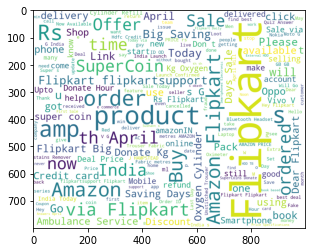

In [67]:
wc = WordCloud(background_color = 'white', width = 1000,height = 800).generate(text)
plt.imshow(wc)
plt.show()